# Homework 3 Task 2

# Alexey Ivashka

### For me it's much faster to complete this task using Python

In [1]:
from openpyxl import load_workbook
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#### Lets read our file and make some preparations

In [2]:
wb = load_workbook('PS3_2.xlsx')
sheet = wb['Problem 1']

df = pd.DataFrame(sheet.values)

df.columns = df.iloc[0]
df

,Company,Segment,Brand,Product,Sales Volume 1000 Ltrs,Price per liter,Weighted Selling Distribution,Sales value kEUR,ROS volume
0,Company,Segment,Brand,Product,Sales Volume 1000 Ltrs,Price per liter,Weighted Selling Distribution,Sales value kEUR,ROS volume
1,CARLSBERG BALTIC,CRAFT,RUGTAIS DUMPIS,RUGTAIS DUMPIS,211.744,2.01795,63.33,None,None
2,CARLSBERG BALTIC,CRAFT,MEZPILS,MEZPILS,202.994,2.11261,68.12,None,None
3,CARLSBERG BALTIC,CRAFT,ALDARIS,PORTERIS,139.581,2.56212,42.29,None,None
4,CARLSBERG BALTIC,CRAFT,ALDARIS,PORTERIS EKSKLUZIVAIS,11.7836,3.48925,23.07,None,None
...,...,...,...,...,...,...,...,...,...
243,None,None,Tell about convert function,None,None,None,None,None,None
244,None,None,None,None,None,None,None,None,None
245,None,None,None,None,None,None,None,None,None
246,None,Next week:,Use filtering; subtotal function,None,None,None,None,None,None


### We see that we have 248 rows, but data is only on 158 rows

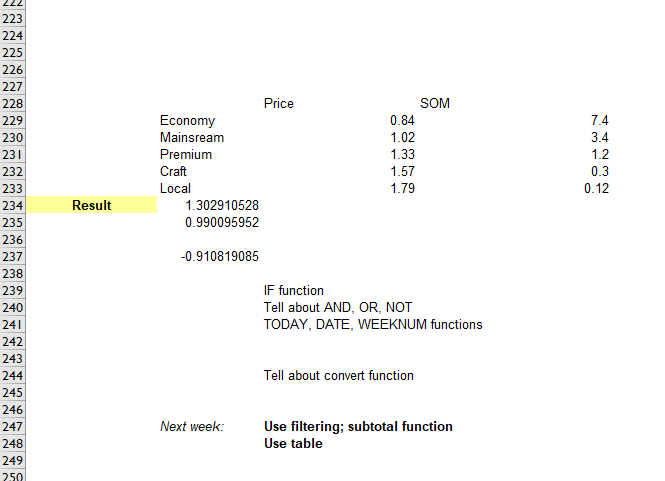

### This data is unnecessary so we can cut it 

In [3]:
df.columns = df.iloc[0]
df = df.iloc[1:158]
df.dtypes

0
Company                          object
Segment                          object
Brand                            object
Product                          object
Sales Volume 1000 Ltrs           object
Price per liter                  object
Weighted Selling Distribution    object
Sales value kEUR                 object
ROS volume                       object
dtype: object

### Let's convert numbers to float type

In [4]:
df['Sales Volume 1000 Ltrs'] = df['Sales Volume 1000 Ltrs'].astype(float)
df['Price per liter'] = df['Price per liter'].astype(float)
df['Weighted Selling Distribution'] = df['Weighted Selling Distribution'].astype(float)
print(df.dtypes)
df.head(5)

0
Company                           object
Segment                           object
Brand                             object
Product                           object
Sales Volume 1000 Ltrs           float64
Price per liter                  float64
Weighted Selling Distribution    float64
Sales value kEUR                  object
ROS volume                        object
dtype: object


,Company,Segment,Brand,Product,Sales Volume 1000 Ltrs,Price per liter,Weighted Selling Distribution,Sales value kEUR,ROS volume
1,CARLSBERG BALTIC,CRAFT,RUGTAIS DUMPIS,RUGTAIS DUMPIS,211.744016,2.017950,63.33,None,None
2,CARLSBERG BALTIC,CRAFT,MEZPILS,MEZPILS,202.993621,2.112613,68.12,None,None
3,CARLSBERG BALTIC,CRAFT,ALDARIS,PORTERIS,139.580734,2.562119,42.29,None,None
4,CARLSBERG BALTIC,CRAFT,ALDARIS,PORTERIS EKSKLUZIVAIS,11.783595,3.489255,23.07,None,None
5,CARLSBERG BALTIC,PREMIUM,ALDARIS,BEZALKOHOLISKAIS,223.500807,1.783514,68.56,None,None


### Our data is ready for further analysis

## Calculate sales value for each row

 I calculate sales value as sales volume multiplied by price per liter

In [5]:
df['Sales value kEUR'] = df['Sales Volume 1000 Ltrs']*df['Price per liter']
df.head()

,Company,Segment,Brand,Product,Sales Volume 1000 Ltrs,Price per liter,Weighted Selling Distribution,Sales value kEUR,ROS volume
1,CARLSBERG BALTIC,CRAFT,RUGTAIS DUMPIS,RUGTAIS DUMPIS,211.744016,2.017950,63.33,427.288764,None
2,CARLSBERG BALTIC,CRAFT,MEZPILS,MEZPILS,202.993621,2.112613,68.12,428.847041,None
3,CARLSBERG BALTIC,CRAFT,ALDARIS,PORTERIS,139.580734,2.562119,42.29,357.622449,None
4,CARLSBERG BALTIC,CRAFT,ALDARIS,PORTERIS EKSKLUZIVAIS,11.783595,3.489255,23.07,41.115967,None
5,CARLSBERG BALTIC,PREMIUM,ALDARIS,BEZALKOHOLISKAIS,223.500807,1.783514,68.56,398.616927,None


## Calculate Mezpils brand share of total volume %

In [6]:
print(round(100*(df[df['Brand'] == 'MEZPILS'].sum()['Sales Volume 1000 Ltrs']/ df['Sales Volume 1000 Ltrs'].sum()), 2),'%')

0.11 %


## Calculate Carlsberg company share of total value %

In [7]:
carlsberg_sales = df[df['Company'] == 'CARLSBERG BALTIC'].sum()['Sales value kEUR']
total_sales = df.sum()['Sales value kEUR']

carlsberg_market_share = round(carlsberg_sales/total_sales,2)*100
print(carlsberg_market_share,'%')

37.0 %


## How many Premium brands are there?

In [8]:
df[df['Segment'] == 'PREMIUM']['Segment'].count()

57

## How many Premium brands of Olvi Group company are there?

In [9]:
df[(df['Segment'] == 'PREMIUM') & (df['Company'] == 'OLVI GROUP')]['Brand']

88      CESU
89      CESU
90      CESU
91      CESU
92      CESU
93      CESU
94    MITAVA
Name: Brand, dtype: object

### Based on the data above there are 2 unique brands

## Calculate Premium  segment total volume

In [10]:
df[df['Segment'] == 'PREMIUM'].sum()['Sales Volume 1000 Ltrs']

16500.02291342169

## What is Carlsberg company volume share in % of premium segment


In [11]:
carlsberg_premium_sales = df[(df['Segment'] == 'PREMIUM') & (df['Company'] == 'CARLSBERG BALTIC')].sum()['Sales value kEUR']
total_premium_sales = df[(df['Segment'] == 'PREMIUM')].sum()['Sales value kEUR']


market_share_carsberg_premium = round(100*carlsberg_premium_sales/total_premium_sales,2)
print(market_share_carsberg_premium,'%')

59.87 %


## Calculate Carlsberg company premium segment Aldaris brand volume share in total premium %

In [12]:
carlsberg_aldaris_premium_sales = df[(df['Segment'] == 'PREMIUM') & (df['Company'] == 'CARLSBERG BALTIC') & (df['Brand'] == 'ALDARIS')].sum()['Sales value kEUR']
total_premium_sales = df[(df['Segment'] == 'PREMIUM')].sum()['Sales value kEUR']

print(round(100*carlsberg_aldaris_premium_sales/total_premium_sales,2),'%')


22.01 %


## How much Carlsberg company share in premium is larger  than its share in total market?

I calculated this as the difference of Carlsberg Market Share in Premium segment and total Carlsberg Market Share

In [13]:
dif = round(market_share_carsberg_premium - carlsberg_market_share,3)
print(dif,'%')


22.87 %


##  How many brands take aggregated 80% of total premium segment market and how many fill up the bottom 10% on the premium segment?

In [14]:
market_share_by_brand = df[df['Segment'] == 'PREMIUM'].groupby(['Brand']).sum()
market_share_by_brand['Market Share by Brand'] = round(100*market_share_by_brand['Sales value kEUR']/market_share_by_brand['Sales value kEUR'].sum(), 3)


market_share_by_brand['Market Share by Brand'].sort_values(ascending=False)


Brand
LACPLESIS      23.347
ALDARIS        22.007
D LIGHT        14.082
CESU           11.758
CARLSBERG       9.607
TUBORG          8.226
MITAVA          4.901
BALTIKA         4.062
ZATECKY GUS     0.882
SAKU            0.400
GRIMBERGEN      0.259
NEVSKOJE        0.186
FAXE            0.070
OLD BOBBY       0.053
MEZPILS         0.048
LOMZA           0.035
SAN MIGUEL      0.026
VILKMERGES      0.023
LVIVSKE         0.022
KARMI           0.005
ZELTA           0.002
Name: Market Share by Brand, dtype: float64

### As we can see from above 5 brands hold 80% of premium segment and 15 companies fill up the bottom 10%

## What is the average price for all Mainstream brands?

In [15]:
mean_litr = df[(df['Segment'] == 'MAINSTREAM')].mean()['Price per liter']

print(round(mean_litr, 3))

1.433


## What is the average price for Carlsberg company Mainstream brands?

In [16]:
mean_litr_carlsberg = df[(df['Segment'] == 'MAINSTREAM') & (df['Company'] == 'CARLSBERG BALTIC')].mean()['Price per liter']

print(round(mean_litr_carlsberg, 3))

1.48
